## Project overview

This project will focus on simple Linear Regression. And compare that to Multi Regression and Polynomial Regresssion. 
The dataset has two columns that are dependent.

### GOAL 
In this project you must perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle.<br>
The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

# Types of Regression

There are severaltypes of regression: 
1. Linear Regression:
Linear Regression has 3 types<br>
    a. Simple Linear Regression<br>
    c. Polynomial Linear Regression<br>
    b. Multipule Linear Regression<br>
2.Logistic Regression<br>
    a. Binomial Logistic Regression<br>
    b. Ordinal Logistic Regression<br> 
    c. Multinomial Logistic Regression<br>

# Simple Linear Regression
****

## Introduction

Simple linear Regession is a statistical approach for modelling relationship between a dependent variable with a given set of independent variables.

The dataset contains to 500 rows of 2 columns speed measured in miles per hour and  power measured in watts.<br> ****
ref:https://www.turbinegenerator.org/wind/what-is-wind/wind-speed/#:~:text=Wind%20Turbine%20Tip%20Speed%20Ratio%20%28TSR%29%20is%20the,2%20Blades%20%3A%20optimum%20ratio%20is%20around%206<br>
Wind Turbine Tip Speed Ratio (TSR) is the speed of the tip divided by the speed of the wind.<br>  
For example if the tip speed is 120 miles/hour and the wind speed is 20 miles/hour than the TSR = 120 / 20 = 6.<br>
The optimum tip TSR depends on how many blades are used to operate the wind turbine:<br>
2 Blades : optimum ratio is around 6<br>
3 Blades : optimum ratio is around 5<br>
4 Blades : optimum ratio is around 3<br>
The TSR is important because if the TSR is too low then the wind turbine will not be efficiently<br>
producing elecricity and may even rotate too slow to produce any energy at all, or too slow that it stalls.<br>
If the TSR is too high then the wind turbine might reach it’s furling speed which would cause the wind turbine<br> to begin to produce decreasing margins of electricity and may even shut down to avoid mechanical failure.

## Objective

In Linear Regression the objective is to find the best fit line. y= mx + c or f(x) = mx + c and the accuracy of that line

![](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-41f1da8f1b6e63d6b8ab96507bc7d397_l3.svg)

* h(xi) represents the predicted response value for ith observation.
* b0 and b1 are regression coefficients and represent y-intercept and slope of regression line respectively.<br>
To create our model, we must “learn” or estimate the values of regression coefficients b_0 and b_1.<br> And once we’ve estimated these coefficients, we can use the model to predict responses!

The accuracy or cost is the distance between the data point and the best fit line.  

In [100]:
# Import linear_model from sklearn.
import sklearn.linear_model as lm
# Let's use pandas to read a csv file and organise our data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [101]:
# Create a linear regression model instance.
m = lm.LinearRegression()

In [102]:
# Plots styles.
plt.style.use('ggplot')

# Plot size.
plt.rcParams['figure.figsize'] = (14, 10)

In [103]:
# read the dataset
df = pd.read_csv('https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv')
#df =pd.read_csv('powerproductiontest.csv')

In [104]:
# the size of the dataset is df.size = 1000/2 as there is 2 columns
df.size/2

500.0

In [105]:
#sum up the null values
df.isnull().sum()

speed    0
power    0
dtype: int64

In [106]:
x = df['speed']
y = df['power']

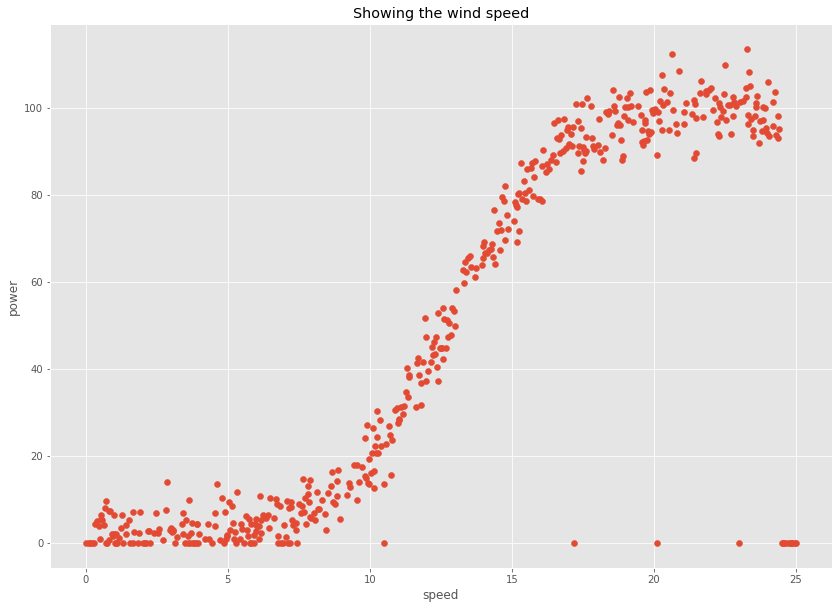

In [107]:
# see the shape of the dataset
plt.scatter(x,y)
plt.title("Showing the wind speed")
plt.xlabel("speed")
plt.ylabel("power")
plt.show();

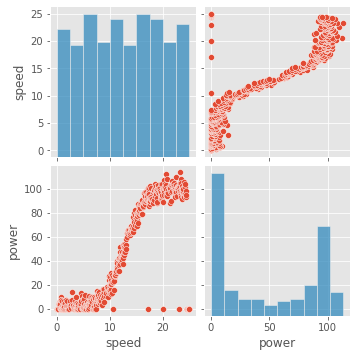

In [94]:
sns.pairplot(df)

The plot above shows the x and y values plotted. The shape is not exactly linear. So, plotting y=mc+c many not be enough to get the correct prediction of y. 

In [108]:
# re-set x and y
x=df[["speed","power"]]
y=df["power"]


In [109]:
m.fit(x,y)

LinearRegression()

In [110]:
m.intercept_

0.0

In [111]:
m.coef_

array([-1.2175553e-15,  1.0000000e+00])

In [112]:
#z = x
#q = y
z=df["speed"]
q=df["power"]

In [113]:
#coefficient of determination R**2
#print('Coefficient of determination is ' ,m.score(x,y))
print(np.corrcoef(z, q)[0][1]**2)

0.7289360258564072


In [114]:
pd.DataFrame(m.coef_, x.columns, columns = ['Coeff'])

,Coeff
speed,-1.217555e-15
power,1.000000e+00


Making Predictions From the Model

In [115]:
predictions = m.predict(x)

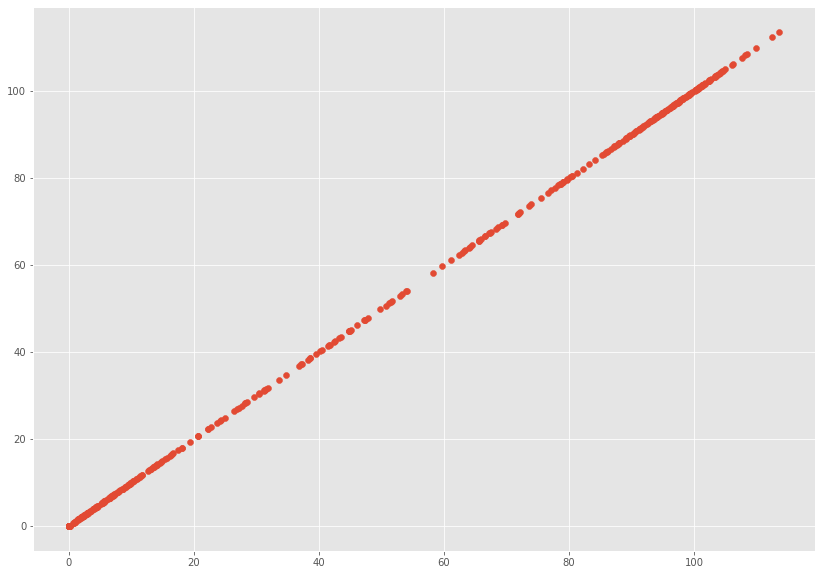

In [117]:
plt.scatter(y, predictions)

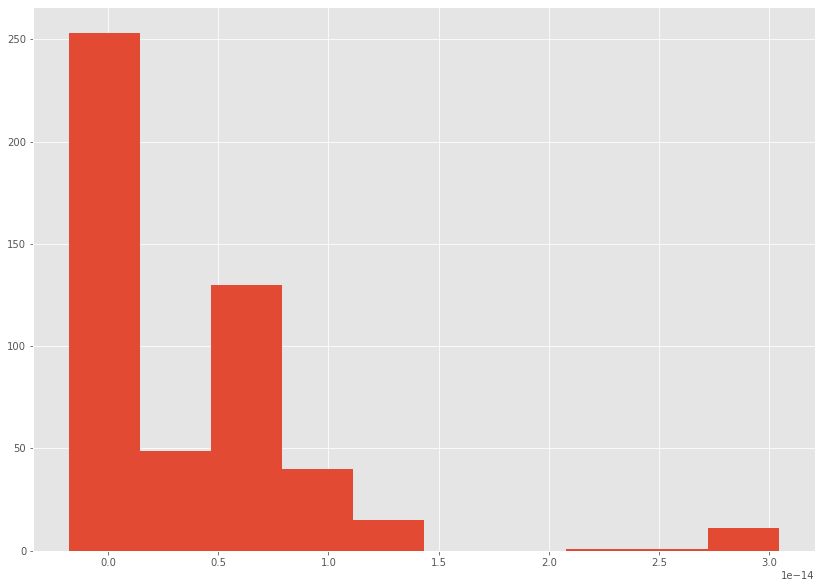

In [121]:
plt.hist(y - predictions);

Mean Absolute Error (MAE)

In [158]:
def metrics(y,predictions):
    from sklearn import metrics
    print("****Absolute error*****\nMAE is the sum of absolute differences between our target and predicted variables.\nSo it measures the average magnitude of errors in a set of predictions, without considering their directions")
    print(metrics.mean_absolute_error(y, predictions))
    print('****Mean Squared Error (MSE)****\nMeasures the average of the squares of the errors—that is,\nthe average squared difference between the estimated values and the actual value')
    print(metrics.mean_squared_error(y, predictions))
    print("****Root Mean Squared Error (RMSE)*****\nThis the square root of the mean of the square of all of the error.\nRMSE is considered an excellent general-purpose error metric for numerical predictions.\nRMSE is a good measure of accuracy, but only to compare prediction errors of different models or model configurations for a particular variable and not between variables, as it is scale-dependent")
    print(np.sqrt(metrics.mean_squared_error(y, predictions)))
    

In [159]:
metrics(y,predictions)

****Absolute error*****
MAE is the sum of absolute differences between our target and predicted variables.
So it measures the average magnitude of errors in a set of predictions, without considering their directions
3.971195278316818e-15
****Mean Squared Error (MSE)****
Measures the average of the squares of the errors—that is,
the average squared difference between the estimated values and the actual value
4.664976854407178e-29
****Root Mean Squared Error (RMSE)*****
This the square root of the mean of the square of all of the error.
RMSE is considered an excellent general-purpose error metric for numerical predictions.
RMSE is a good measure of accuracy, but only to compare prediction errors of different models or model configurations for a particular variable and not between variables, as it is scale-dependent
6.830063582725404e-15


In [53]:
# what is polyfit ? 
# this numpy function will return m and c. and in this case takes the argument of df[speed] and df[power].
# setting the thrid parameter "order" to 1 will return m and c if the best is equation is y = mx + c where the data is linear.
# setting the thrid parameter "order" to 2 will return m and c if the best fit where the data is a polynominal
# setting the thrid parameter "order" to 3 will return m and c if the best fit from the data is a cubic
np.polyfit(z,q,1)

array([  4.91759567, -13.89990263])

****
### Polyfit 1 : y = m*x + c
****

If we want to fit these data points into a polynomial of various degrees like linear (having degree 1), which is of the form y=mx+c, we need to have two constant-coefficient values for m and c which is calculated using the numpy.polyfit() function.

In [75]:
m,b =np.polyfit(z,q,1)
print( "linear return m =", m ," and b =",b)

linear return m = 4.917595665404667  and b = -13.899902630519604


In [76]:
# Calculate the cost of the lines above for the data above.
cost = lambda m,b: np.sum([(z[i] - m * q[i] - c)**2 for i in range(q.size)])# y = mx+c --> y = 4.92x + -13.9

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (m, b, cost(m, b)))
#print("Cost with m = %5.2f and c = %5.2f: %8.2f % ()")

Cost with m =  4.92 and c = -13.90: 41836463.25


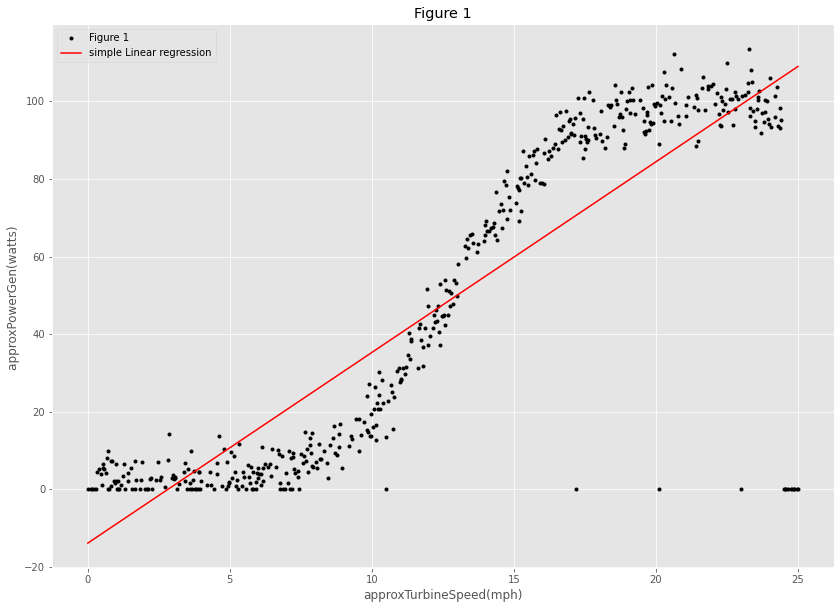

In [78]:
#plotting the best fit line with the m and c when polyfit order parameter is 1
plt.plot(z, q, 'k.',label="Figure 1")
plt.title("Figure 1")
#y = mc + c
plt.plot(z, m * z + b, 'r-',label="simple Linear regression")
plt.xlabel("approxTurbineSpeed(mph)")
plt.ylabel("approxPowerGen(watts) ")
plt.legend(loc="best")

The above plot shows the best fit line when the order parameter in polyfit is set to 1

# Polynominal Linear Regression

****
### Polynomial Linear Regession using PolyFit part 2: y = ax**2+bx+c
****

The ploynomial Linear regression is member of the multilinear regression.<br> It makes more sence to plot it here rather that in the Multilinear regression section of this project.

In the case of a quadratic equation (having degree 2), which is of the form y=ax**2+bx+c, we need to have three constant-coefficient values for a, b, and c, which is calculated using the numpy.polyfit() function.

In [80]:
a,b,c = np.polyfit(z,q,2)

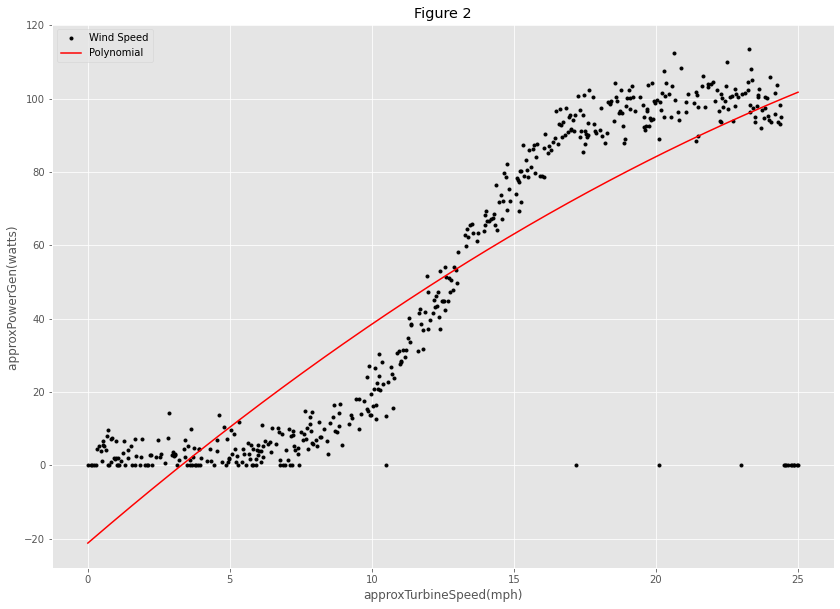

In [83]:
plt.plot(z, q, 'k.',label="Wind Speed")
plt.title("Figure 2")
plt.plot(z, a * z * z + b * z + c, 'r-',label="Polynomial")
#plt.plot(z,a * z*z+b * z*z*+d*z+c,'r-',label="Regression")
#plt.plot(x, m * x + c, 'r-')
#plt.plot(x, m * x * x + b * x+d* z + c, 'r-')

plt.xlabel("approxTurbineSpeed(mph)")
plt.ylabel("approxPowerGen(watts) ")
plt.legend(loc="best")

The above plot shows the best fit line when the order parameter in polyfit is set to 2

****
### Cubic Regression using Polyfit 3 : y=ax**3+bx**2+cx+d
****

With a cubic polynomial of the form y=ax**3+bx**2+cx+d; we need to have four constant-coefficient values for a, b, c, and d, which is calculated using the numpy.polyfit() function.

In [85]:
a,b,c,d = np.polyfit(z,q,3)

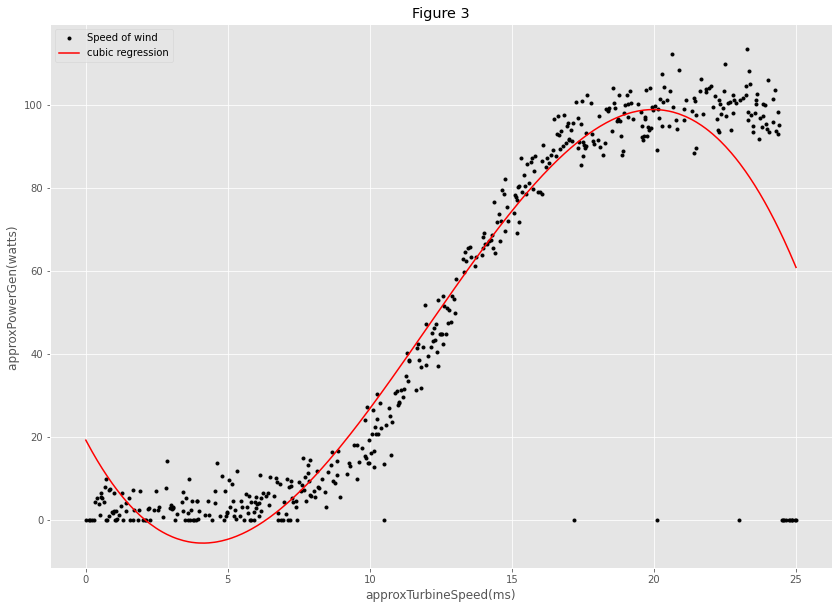

In [87]:
plt.plot(z, q, 'k.',label="Speed of wind")
plt.title("Figure 3")
#cubic polynominal y=ax**3+bx**2+cx+d;
plt.plot(z, a * z **3+ b * z **2 + c*z + d,'r-',label="cubic regression")
plt.xlabel("approxTurbineSpeed(ms)")
plt.ylabel("approxPowerGen(watts) ")
plt.legend(loc="best")

The above plot show the best fit line when the equation for the line is a cubic

### Determine the accuracy of the model

##### https://www.codeproject.com/Articles/5282014/Segmented-Linear-Regression#:~:text=The%20accuracy%20of%20linear%20regression%20in%20a%20range,of%20segments%20in%20a%20computed%20segmented%20linear%20regression.

The deviation at a specified x value is defined as the absolute difference between original and approximation y values. The accuracy of linear regression in a range and the approximation error are defined as the maximum of all of the values of the deviations in the range. The maximum allowed deviation (tolerance) is an important user interface parameter of the model. It controls the total number and lengths of segments in a computed segmented linear regression. If input value of this parameter is very large, there is no splitting of a given dataset. The result is just one line segment of linear regression. If input value is very small, then the result may have many short segments.

### Hypothesis Testing and p-values 
Just for fun<br>
null hypothesis:
There is no relationship between wind turbine speed  and power
β1  equals zero<br>
alternative hypothesis:
There is a relationship between TV ads and Sales
β1  is not equal to zero <br>
Testing hypothesis

Reject the null
There is a relationship
If the 95% confidence interval does not include zero
Fail to reject the null
There is no relationship
If the 95% confidence interval includes zero

# Using the model for prediction

Manual:

In [61]:
#cubic polynominal y=ax**3+bx**2+cx+d;
# y = (a * x to the power of 3)+(b*x to the power of 2)+(c*x)+d
def findy(x):
    print('x =',x)
    y = (a*x**3) + (b*x**2) + (c*x) +d
    return '{:.2f}'.format(y)
print('y = ', findy(10))

x = 10
y =  26.84


In measurement of a set, accuracy is closeness of the measurements to a specific value : ref: https://en.wikipedia.org/wiki/Accuracy_and_precision

To explain accuracy is how far the datapoint is from the best fit line. This is called the cost.

In [129]:
from sklearn.metrics import mean_squared_error

In [262]:
# get a new predicted series that has random values in the same range as the sample
import random
# get a sample of the real dataset
Y_true = df.sample(frac = .20)
# get the predic column = power
Y_true = Y_true['power']
#sort the values 
yTrueSorted = Y_true.sort_values()
yTrueSize =  yTrueSorted.size
first =int(yTrueSorted.iloc[0]) 
last = int(yTrueSorted.iloc[yTrueSize -1])
y_pred = []
for j in range(len(Y_true)):
    y_pred.append(random.randint(first,last))
sortedY_pred =sorted(y_pred)

print("Sorted Sklean Mean Squared error is {:.2f}".format(mean_squared_error(yTrueSorted,sortedY_pred)))
print("Unsorted Sklean Mean Squared error is {:.2f}".format(mean_squared_error(Y_true,y_pred)))
SMSE = np.square(np.subtract(yTrueSorted,sortedY_pred)).mean()
print("Sorted Numpy Mean squared error is {:.2f}".format(SMSE)) 
MSE = np.square(np.subtract(Y_true,y_pred)).mean()
print("Unsorted Numpy Mean squared error is {:.2f}".format(MSE))    
    


Sorted Sklean Mean Squared error is 349.03
Unsorted Sklean Mean Squared error is 2631.43
Sorted Numpy Mean squared error is 349.03
Unsorted Numpy Mean squared error is 2631.43


Statsmodels Prediction: just for fun

In [244]:
### STATSMODELS ###
import statsmodels.formula.api as smf
# create a fitted model
lm1 = smf.ols(formula='power ~ speed', data=df).fit()

# print the coefficients
lm1.pvalues

Intercept     3.609334e-12
speed        2.859689e-143
dtype: float64

p-value

Represents the probability that the coefficient is actually zero
Interpreting p-values

If the 95% confidence interval does not include zero
p-value will be less than 0.05
Reject the null
<br><br>
There is a relationship
If the 95% confidence interval includes zero
p-value for that coefficient will be greater than 0.05<br>
Fail to reject the null<br>
There is no relationship

In [59]:
#statsmodel r**2
lm1.rsquared

0.7289360258564073

In [304]:
np.corrcoef(z, q)[0][1]**2

0.7289360258564072

In [312]:
### SCIKIT-LEARN ###
m.score(x, y)
# does not make sense that the score is perfect.

1.0

In [254]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  power   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     1339.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):          2.86e-143
Time:                        14:29:18   Log-Likelihood:                -2246.8
No. Observations:                 500   AIC:                             4498.
Df Residuals:                     498   BIC:                             4506.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.8999      1.950     -7.128      0.000     -17.731     -10.068
speed          4.9176      0.134     36.595      0.000       4.654       5.182
==============================================================================
Omnibus:                      321.893   Durbin-Watson:                   0.352
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3246.151
Skew:                          -2.728   Prob(JB):                         0.00
Kurtosis:                      14.227   Cond. No.                         29.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multilinear Regression

importing a newe dataset that has two speeds(x) and a power(y) 

In [3]:
# creating a second import cell,no harm.
import sklearn.linear_model as lm
# Let's use pandas to read a csv file and organise our data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Create a linear regression model instance.
m = lm.LinearRegression()

In [5]:
# Plots styles.
plt.style.use('ggplot')

# Plot size.
plt.rcParams['figure.figsize'] = (14, 10)

In [6]:
#Use with MultiLinear with create a 2D array of inputs on the powerproduction dataset
# defined variales: n = speed, v = speed2, y1 = power
# v = x
dfM =pd.read_csv('powerproduction_MultiSpeeds.csv')
n = dfM['speed']
v = dfM['speed2']
y1 = dfM['power']
ncom = dfM[['speed','speed2']]


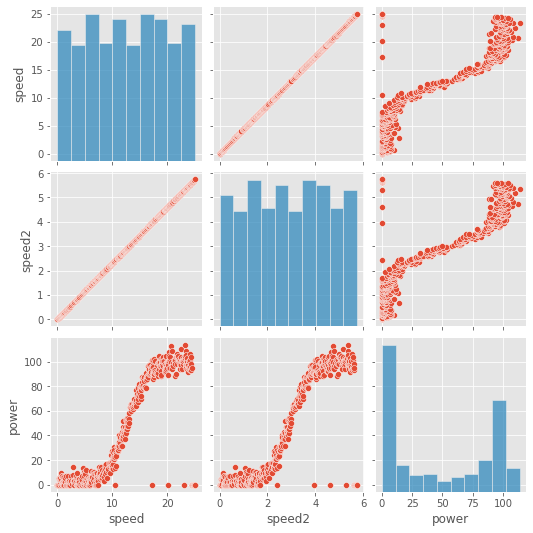

In [139]:
# looking at the data
sns.pairplot(dfM)

In [7]:
m.fit(ncom,y1)

LinearRegression()

In [8]:
# y intercept b0. when x1 and x2 = 0 
y_intercept = m.intercept_
y_intercept

-13.899902630519676

In [9]:
#r squared 
r_sq= m.score(ncom,y1)
r_sq

0.7289360258564073

In [10]:
m.coef_

array([4.6705249 , 1.07422073])

In [11]:
m.score(ncom,y1)

0.7289360258564073

In [12]:
#slope m is equal to the tangent of the angle that the line makes with the positive direction of the x-axis.
# b1 and b2
slope = m.coef_
slope

array([4.6705249 , 1.07422073])

In [13]:
y_pred = m.predict(ncom)


In [14]:
a,b,c,d = np.polyfit(n,y1,3)

In [15]:
a1,b1,c1,d1 = np.polyfit(v,y1,3)

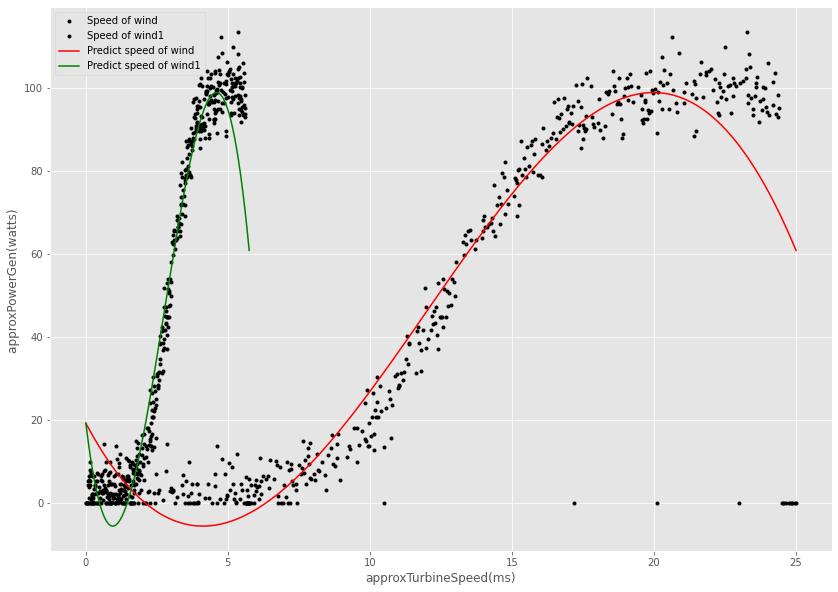

In [37]:
plt.plot(v, y1, 'k.',label="Speed of wind")
plt.plot(n, y1, 'k.',label="Speed of wind1")
#cubic polynominal y=ax**3+bx**2+cx+d;
plt.plot(n, a * n **3+ b * n **2 + c*n + d,'r-',label="Predict speed of wind")
plt.plot(v, a1 * v **3+ b1 * v **2 + c1*v + d1,'g-',label="Predict speed of wind1")
plt.xlabel("approxTurbineSpeed(ms)")
plt.ylabel("approxPowerGen(watts) ")
plt.legend(loc="best")

To be more precsise this is multiple cubic linear regression, if theres such a think. <br> 
Where both values of wind speed are plotted together to predict the power generated but the various wind speeds.

## Accuracy of both cubic functions

In [88]:
from sklearn.metrics import mean_squared_error

In [91]:
# get a new predicted series that has random values in the same range as the sample
import random
# get a sample of the dataset
Y_true = dfM.sample(frac = .20)
# get the predic column = power
Y_true = Y_true['power']
#sort the values 
yTrueSorted = Y_true.sort_values()
yTrueSize =  yTrueSorted.size
first =int(yTrueSorted.iloc[0]) 
last = int(yTrueSorted.iloc[yTrueSize -1])
y_pred = []
for j in range(len(Y_true)):
    y_pred.append(random.randint(first,last))
sortedY_pred =sorted(y_pred)

print("Sorted Sklean Mean Squared error is {:.2f}".format(mean_squared_error(yTrueSorted,sortedY_pred)))
print("Unsorted Sklean Mean Squared error is {:.2f}".format(mean_squared_error(Y_true,y_pred)))
SMSE = np.square(np.subtract(yTrueSorted,sortedY_pred)).mean()
print("Sorted Numpy Mean squared error is {:.2f}".format(SMSE)) 
MSE = np.square(np.subtract(Y_true,y_pred)).mean()
print("Unsorted Numpy Mean squared error is {:.2f}".format(MSE)) 

Sorted Sklean Mean Squared error is 232.34
Unsorted Sklean Mean Squared error is 2374.06
Sorted Numpy Mean squared error is 232.34
Unsorted Numpy Mean squared error is 2374.06


In [160]:
metrics(y1,y_pred)

****Absolute error*****
MAE is the sum of absolute differences between our target and predicted variables.
So it measures the average magnitude of errors in a set of predictions, without considering their directions
14.475951557238284
****Mean Squared Error (MSE)****
Measures the average of the squares of the errors—that is,
the average squared difference between the estimated values and the actual value
468.48232830642434
****Root Mean Squared Error (RMSE)*****
This the square root of the mean of the square of all of the error.
RMSE is considered an excellent general-purpose error metric for numerical predictions.
RMSE is a good measure of accuracy, but only to compare prediction errors of different models or model configurations for a particular variable and not between variables, as it is scale-dependent
21.644452598909133


That covers the linear Regression.

# Logistic Regression 
A Classification method . A way of separated the data. 

### Binomial Logistic Regression

This is type of prediction is 0 or 1, yes or no, win or loss, pass or fail, dead or alive , etc. Generates a sigmoid function. 
The sigmoid function, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO. The outputcannotFor example: If the output is 0.75, we can say in terms of probability as: There is a 75 percent chance that patient will suffer from cancer.

![](https://www.tutorialandexample.com/wp-content/uploads/2019/09/Logistic-Regression.png)

In = p/(1-p)
   = b0 + b1x  
y = mx + c , y = y = ax**2+bx+c or y=ax**3+bx**2+cx+d

![],(https://aigeekprogrammer.com/wp-content/uploads/2019/10/Logistic-Regression-for-binary-classification-768x384.jpg)

The dateset look like the sigmoid function, but have not found a way of classifing the dataset.

Types if Logistic Regression: 
1.Binary Logistic Regression:<br> 
The target variable has only two possible outcomes such as Spam or Not Spam, Cancer or No Cancer.<br>
2. Multinomial Logistic Regression:<br>
The target variable has three or more nominal categories such as predicting the type of Wine.<br>
3. Ordinal Logistic Regression :<br>
The target variable has three or more ordinal categories such as restaurant or product rating from 1 to 5

# Complaring Logistic Regression and Linear Regression

Linear regression gives you a continuous output, but logistic regression provides a constant output. <r>An example of the continuous output is house price and stock price.<br> Example's of the discrete output is predicting whether a patient has cancer or not, predicting whether the customer will churn. <br>Linear regression is estimated using Ordinary Least Squares (OLS) while logistic regression is estimated using Maximum Likelihood Estimation (MLE) approach

Maximum Likeihood Estimation(MLE), this method will estimate the parameters of a model.<br> 
The maximum likelihood (ML) estimation will choose values for the estimated parameters (betas) that would maximize the probability of observing the Y values in the sample with the given X values. This probability is summarized in what is called the likelihood function. <br> ref: https://www.dummies.com/education/economics/econometrics/using-maximum-likelihood-ml-estimation/